## Importing Libraries

In [1]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


## Reading dataset

In [2]:
data = pd.read_csv('diabetes.csv')
print(data.head(5))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## Dataset Description

Id has been removed, we have trimmed the dataset to Numeric features and Outcome as Target Feature.
Dataset description is as follows.

### Features
Pregnancies	Glucose	BloodPressure	SkinThickness	Insulin	BMI	DiabetesPedigreeFunction	Age

### Class
Outcome - 1/0

### Samples
Number of rows = 768




In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# setting target feature outcome and dropping it.
target = data['Outcome']
data = data.drop('Outcome', axis=1)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [6]:
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.manifold import TSNE # TSNE module
from sklearn.manifold import Isomap #isomap

In [11]:
# Turn dataframe into arrays
X = data.values

In [12]:
# Calling Sklearn scaling method
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

## PCA

In [13]:
# Invoke the PCA method. Since this is a binary classification problem
# let's call n_components = 2
pca2 = PCA(n_components=2)
pca_2d = pca2.fit_transform(X_std)



Text(0.5, 1.0, 'PCA Scatter Plot with n_components =2')

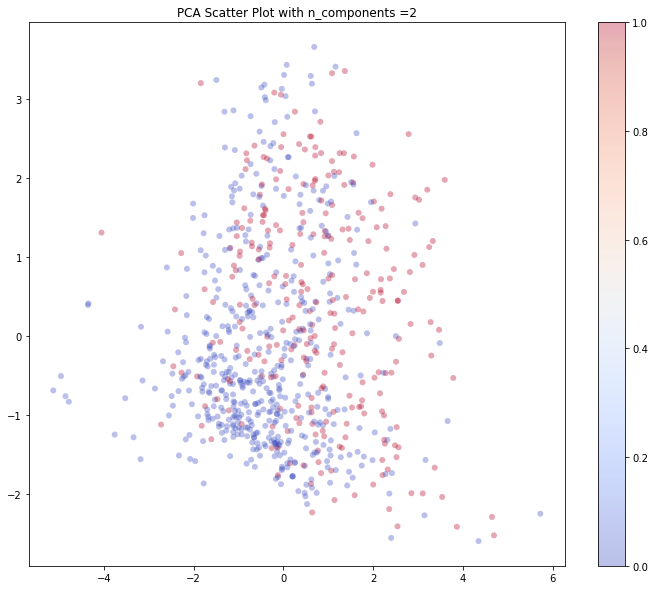

In [17]:
plt.figure(figsize = (12,10))

plt.scatter(pca_2d[:,0],pca_2d[:,1], c = target, 
            cmap = "coolwarm", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('PCA Scatter Plot with n_components =2')


# TSNE

### TSNE method with components = 2, verbose =1 , perplexity=20, n_iter=1500

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 768 samples in 0.001s...
[t-SNE] Computed neighbors for 768 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 768 / 768
[t-SNE] Mean sigma: 0.753414
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.031403
[t-SNE] KL divergence after 5000 iterations: 1.071690


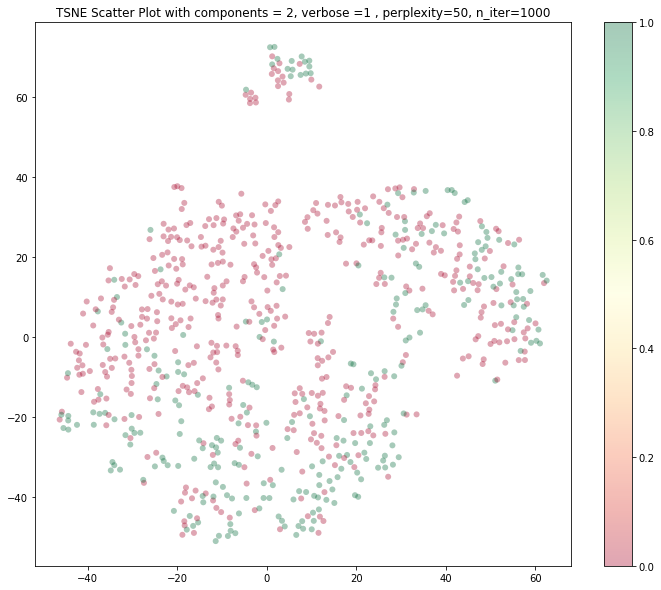

In [24]:
#TSNE method with components = 2, verbose =1 , perplexity=20, n_iter=1500
tsne = TSNE(n_components=2, verbose=1, perplexity=20, n_iter=5000)
tsne_data = tsne.fit_transform(X_std)
plt.figure(figsize = (12,10))
plt.scatter(tsne_data[:,0],tsne_data[:,1],  c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('TSNE Scatter Plot with components = 2, verbose =1 , perplexity=20, n_iter=5000')
plt.show()

### Isomap with components 
n_neighbors=3, n_components=2, eigen_solver='auto', tol=0, 
                max_iter=1000, path_method='auto', neighbors_algorithm='auto', 
                n_jobs=None, metric='minkowski', p=2, metric_params=None

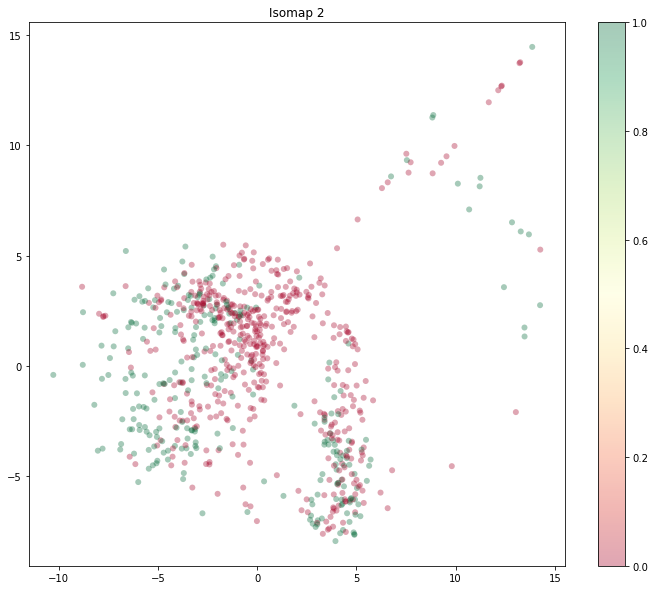

In [27]:
X_isomap2 = Isomap(n_neighbors=3, n_components=2, eigen_solver='auto', tol=0, 
                max_iter=1000, path_method='auto', neighbors_algorithm='auto', 
                n_jobs=None, metric='minkowski', p=2, metric_params=None)
isomap_data2 = X_isomap2.fit_transform(X_std)
plt.figure(figsize = (12,10))
plt.scatter(isomap_data2[:,0],isomap_data2[:,1],  c = target, 
            cmap = "RdYlGn", edgecolor = "None", alpha=0.35)
plt.colorbar()
plt.title('Isomap 2')
plt.show()